In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SL/Housing.csv')

In [4]:
df.shape

(545, 13)

In [5]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [6]:
df['furnishingstatus'].nunique()

3

In [21]:
df['mainroad']=df.groupby('mainroad')['price'].transform('mean')
df['guestroom']=df.groupby('guestroom')['price'].transform('mean')
df['basement']=df.groupby('basement')['price'].transform('mean')
df['hotwaterheating']=df.groupby('hotwaterheating')['price'].transform('mean')
df['airconditioning']=df.groupby('airconditioning')['price'].transform('mean')
df['prefarea']=df.groupby('prefarea')['price'].transform('mean')
df['furnishingstatus']=df.groupby('furnishingstatus')['price'].transform('mean')

In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,4.991777e+06,4.544546e+06,4.509966e+06,4.728593e+06,6.013221e+06,2,5.879046e+06,5.495696e+06
1,12250000,8960,4,4,4,4.991777e+06,4.544546e+06,4.509966e+06,4.728593e+06,6.013221e+06,3,4.425299e+06,5.495696e+06
2,12250000,9960,3,2,2,4.991777e+06,4.544546e+06,5.242615e+06,4.728593e+06,4.191940e+06,2,5.879046e+06,4.907524e+06
3,12215000,7500,4,2,2,4.991777e+06,4.544546e+06,5.242615e+06,4.728593e+06,6.013221e+06,3,5.879046e+06,5.495696e+06
4,11410000,7420,4,1,2,4.991777e+06,5.792897e+06,5.242615e+06,4.728593e+06,6.013221e+06,2,4.425299e+06,5.495696e+06


In [23]:
#normaliztion(scaling)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.000000
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.000000
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.603087
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.000000
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.000000
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.603087
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000


In [24]:
y=df1['price']
x=df1.drop('price',axis=1)
y.shape,x.shape

((545,), (545, 12))

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((381, 12), (164, 12), (381,), (164,))

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
model.coef_

array([0.31039697, 0.01959006, 0.26477477, 0.13658528, 0.04098972,
       0.02376751, 0.04792801, 0.07098812, 0.05282266, 0.07096655,
       0.04358941, 0.03623753])

In [28]:
model.intercept_

-0.0050427725675667445

In [29]:
y_test_predict=model.predict(x_test)

In [30]:
y_test_predict

array([0.39212241, 0.3992514 , 0.4157957 , 0.32811624, 0.21708473,
       0.10331892, 0.08021793, 0.48958336, 0.05751255, 0.23545439,
       0.18222804, 0.15989542, 0.25486183, 0.24979001, 0.30841766,
       0.53006885, 0.21795914, 0.15451842, 0.42422593, 0.08250987,
       0.23965102, 0.30521207, 0.29084529, 0.15074373, 0.32307228,
       0.44872861, 0.09232019, 0.49245185, 0.49992741, 0.22522666,
       0.50175512, 0.43251853, 0.275487  , 0.25049404, 0.37837478,
       0.24855909, 0.40426275, 0.13840158, 0.28524945, 0.34960213,
       0.19023513, 0.13287118, 0.17051908, 0.23830575, 0.39227756,
       0.1453924 , 0.270325  , 0.08141018, 0.06983105, 0.13624427,
       0.27937473, 0.23428278, 0.07933124, 0.12302344, 0.2876942 ,
       0.23077307, 0.13604747, 0.2045806 , 0.15796126, 0.27037173,
       0.41424826, 0.41648853, 0.08231788, 0.21031629, 0.22184729,
       0.02575498, 0.22738193, 0.12202912, 0.24198095, 0.22565074,
       0.34060196, 0.30090439, 0.31023721, 0.08146455, 0.24929

In [31]:
model.score(x_test,y_test)

0.6632797143677536

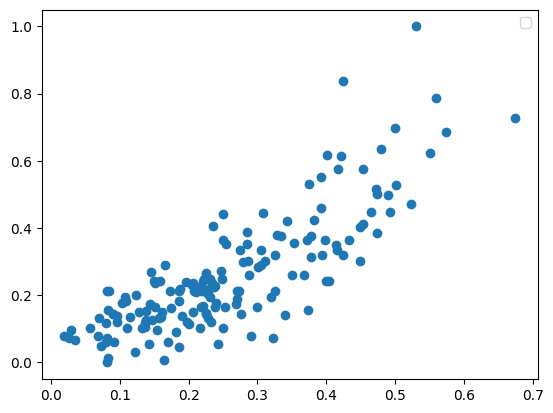

In [32]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter(y_test_predict,y_test)
plt.legend()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'area'),
  Text(1, 0, 'bedrooms'),
  Text(2, 0, 'bathrooms'),
  Text(3, 0, 'stories'),
  Text(4, 0, 'mainroad'),
  Text(5, 0, 'guestroom'),
  Text(6, 0, 'basement'),
  Text(7, 0, 'hotwaterheating'),
  Text(8, 0, 'airconditioning'),
  Text(9, 0, 'parking'),
  Text(10, 0, 'prefarea'),
  Text(11, 0, 'furnishingstatus')])

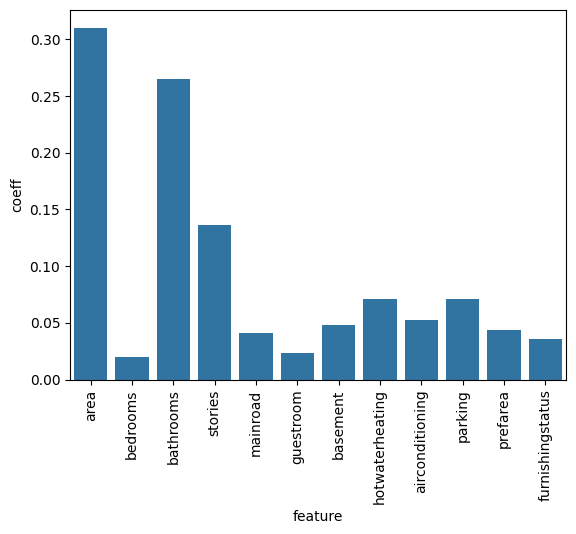

In [33]:
import seaborn as sns
imp=pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))),columns=['feature','coeff'])
sns.barplot(x='feature',y='coeff',data=imp)
plt.xticks(rotation=90)